# Before your start:
- Read the README.md file
- Comment as much as you can and use the resources in the README.md file
- Happy learning!

In [1]:
# Import your libraries:

%matplotlib inline

import numpy as np
import pandas as pd

In this lab, we will explore a dataset that describes websites with different features and labels them either benign or malicious . We will use supervised learning algorithms to figure out what feature patterns malicious websites are likely to have and use our model to predict malicious websites.

# Challenge 1 - Explore The Dataset

Let's start by exploring the dataset. First load the data file:

In [2]:
websites = pd.read_csv('../website.csv')

#### Explore the data from an bird's-eye view.

You should already been very familiar with the procedures now so we won't provide the instructions step by step. Reflect on what you did in the previous labs and explore the dataset.

Things you'll be looking for:

* What the dataset looks like?
* What are the data types?
* Which columns contain the features of the websites?
* Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?
* Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

Feel free to add additional cells for your explorations. Make sure to comment what you find out.

In [3]:
# Your code here

websites.head()

,URL,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CHARSET,SERVER,CONTENT_LENGTH,WHOIS_COUNTRY,WHOIS_STATEPRO,WHOIS_REGDATE,WHOIS_UPDATED_DATE,...,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,7,iso-8859-1,nginx,263.0,None,None,10/10/2015 18:21,None,...,0,2,700,9,10,1153,832,9,2.0,1
1,B0_2314,16,6,UTF-8,Apache/2.4.10,15087.0,None,None,None,None,...,7,4,1230,17,19,1265,1230,17,0.0,0
2,B0_911,16,6,us-ascii,Microsoft-HTTPAPI/2.0,324.0,None,None,None,None,...,0,0,0,0,0,0,0,0,0.0,0
3,B0_113,17,6,ISO-8859-1,nginx,162.0,US,AK,7/10/1997 4:00,12/09/2013 0:45,...,22,3,3812,39,37,18784,4380,39,8.0,0
4,B0_403,17,6,UTF-8,None,124140.0,US,TX,12/05/1996 0:00,11/04/2017 0:00,...,2,5,4278,61,62,129889,4586,61,4.0,0


In [4]:
websites.dtypes

URL                           object
URL_LENGTH                     int64
NUMBER_SPECIAL_CHARACTERS      int64
CHARSET                       object
SERVER                        object
CONTENT_LENGTH               float64
WHOIS_COUNTRY                 object
WHOIS_STATEPRO                object
WHOIS_REGDATE                 object
WHOIS_UPDATED_DATE            object
TCP_CONVERSATION_EXCHANGE      int64
DIST_REMOTE_TCP_PORT           int64
REMOTE_IPS                     int64
APP_BYTES                      int64
SOURCE_APP_PACKETS             int64
REMOTE_APP_PACKETS             int64
SOURCE_APP_BYTES               int64
REMOTE_APP_BYTES               int64
APP_PACKETS                    int64
DNS_QUERY_TIMES              float64
Type                           int64
dtype: object

In [5]:
websites.Type.value_counts()

# 0 es benigno y 1 es maligno

0    1565
1     216
Name: Type, dtype: int64

In [6]:
# Which column contains the feature we will predict? What is the code standing for benign vs malicious websites?

# Columna Type, vamos a predecir si la website es benigna o maligna. 0 es benigno y 1 es maligno

In [7]:
# Which columns contain the features of the websites?

# las columnas de features las elegimos nosotros, tenemos que determinar cuales son relevantes, aquí por supuesto que
# no incluimos los índices, ni las columnas que no nos aporten información.

In [8]:
# Do we need to transform any of the columns from categorical to ordinal values? If so what are these columns?

# Sí, si encontramos una columna categórica que nos interese y queramos hacer train con ella, hay que hacer
# one hot encoding para pasarla a 0 y 1.

#### Next, evaluate if the columns in this dataset are strongly correlated.

In the Mushroom supervised learning lab we did recently, we mentioned we are concerned if our dataset has strongly correlated columns because if it is the case we need to choose certain ML algorithms instead of others. We need to evaluate this for our dataset now.

Luckily, most of the columns in this dataset are ordinal which makes things a lot easier for us. In the next cells below, evaluate the level of collinearity of the data.

We provide some general directions for you to consult in order to complete this step:

1. You will create a correlation matrix using the numeric columns in the dataset.

1. Create a heatmap using `seaborn` to visualize which columns have high collinearity.

1. Comment on which columns you might need to remove due to high collinearity.

In [9]:
# Your code here

corr = websites.corr()
corr

,URL_LENGTH,NUMBER_SPECIAL_CHARACTERS,CONTENT_LENGTH,TCP_CONVERSATION_EXCHANGE,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,SOURCE_APP_PACKETS,REMOTE_APP_PACKETS,SOURCE_APP_BYTES,REMOTE_APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.917986,0.129745,-0.038407,-0.039839,-0.046367,-0.026446,-0.042264,-0.033779,-0.014857,-0.026686,-0.042264,-0.068582,0.162104
NUMBER_SPECIAL_CHARACTERS,0.917986,1.000000,0.214225,-0.037459,-0.042619,-0.047103,-0.023914,-0.040096,-0.030597,-0.014376,-0.024098,-0.040096,-0.050048,0.280897
CONTENT_LENGTH,0.129745,0.214225,1.000000,0.078451,-0.000381,0.004774,0.051202,0.074142,0.091077,0.100094,0.047595,0.074142,-0.045644,-0.090852
TCP_CONVERSATION_EXCHANGE,-0.038407,-0.037459,0.078451,1.000000,0.555188,0.331080,0.457320,0.997796,0.990848,0.865580,0.458702,0.997796,0.349832,-0.040202
DIST_REMOTE_TCP_PORT,-0.039839,-0.042619,-0.000381,0.555188,1.000000,0.210188,0.780238,0.558612,0.591188,0.313359,0.781212,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,-0.047103,0.004774,0.331080,0.210188,1.000000,0.023126,0.361104,0.304683,0.171651,0.025324,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,-0.023914,0.051202,0.457320,0.780238,0.023126,1.000000,0.445822,0.468999,0.074464,0.999992,0.445822,0.012221,-0.011262
SOURCE_APP_PACKETS,-0.042264,-0.040096,0.074142,0.997796,0.558612,0.361104,0.445822,1.000000,0.989285,0.857495,0.447448,1.000000,0.410843,-0.034414
REMOTE_APP_PACKETS,-0.033779,-0.030597,0.091077,0.990848,0.591188,0.304683,0.468999,0.989285,1.000000,0.880555,0.470401,0.989285,0.355716,-0.032897
SOURCE_APP_BYTES,-0.014857,-0.014376,0.100094,0.865580,0.313359,0.171651,0.074464,0.857495,0.880555,1.000000,0.075328,0.857495,0.215285,-0.043852


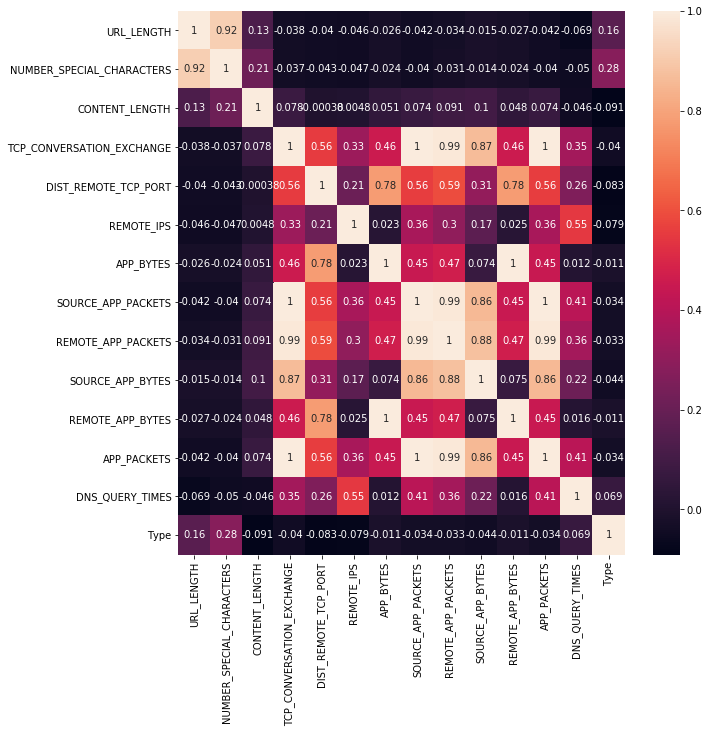

In [10]:
# Your comment here

import seaborn as sns
import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, annot=True)
#sns.set_palette("husl")

# Challenge 2 - Remove Column Collinearity.

From the heatmap you created, you should have seen at least 3 columns that can be removed due to high collinearity. Remove these columns from the dataset.

Note that you should remove as few columns as you can. You don't have to remove all the columns at once. But instead, try removing one column, then produce the heatmap again to determine if additional columns should be removed. As long as the dataset no longer contains columns that are correlated for over 90%, you can stop. Also, keep in mind when two columns have high collinearity, you only need to remove one of them but not both.

In the cells below, remove as few columns as you can to eliminate the high collinearity in the dataset. Make sure to comment on your way so that the instructional team can learn about your thinking process which allows them to give feedback. At the end, print the heatmap again.

In [11]:
# Your code here

# Vamos a borrar primero la columna REMOTE_APP_PACKETS y SOURCE_APP_PACKETS para dejar APP_PACKETS (TAMBIÉN TCP_CONVERSATION_EXCHANGE, REMOTE_APP_BYTES, SOURCE_APP_BYTES, NUMBER_SPECIAL_CHARACTERS)

websites.drop(['REMOTE_APP_PACKETS', 'SOURCE_APP_PACKETS', 'REMOTE_APP_BYTES', 'SOURCE_APP_BYTES', 'TCP_CONVERSATION_EXCHANGE', 'NUMBER_SPECIAL_CHARACTERS'], axis = 1, inplace = True)


In [12]:
# Your comment here

corr = websites.corr()
corr

,URL_LENGTH,CONTENT_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
URL_LENGTH,1.000000,0.129745,-0.039839,-0.046367,-0.026446,-0.042264,-0.068582,0.162104
CONTENT_LENGTH,0.129745,1.000000,-0.000381,0.004774,0.051202,0.074142,-0.045644,-0.090852
DIST_REMOTE_TCP_PORT,-0.039839,-0.000381,1.000000,0.210188,0.780238,0.558612,0.259942,-0.082925
REMOTE_IPS,-0.046367,0.004774,0.210188,1.000000,0.023126,0.361104,0.548189,-0.078783
APP_BYTES,-0.026446,0.051202,0.780238,0.023126,1.000000,0.445822,0.012221,-0.011262
APP_PACKETS,-0.042264,0.074142,0.558612,0.361104,0.445822,1.000000,0.410843,-0.034414
DNS_QUERY_TIMES,-0.068582,-0.045644,0.259942,0.548189,0.012221,0.410843,1.000000,0.068753
Type,0.162104,-0.090852,-0.082925,-0.078783,-0.011262,-0.034414,0.068753,1.000000


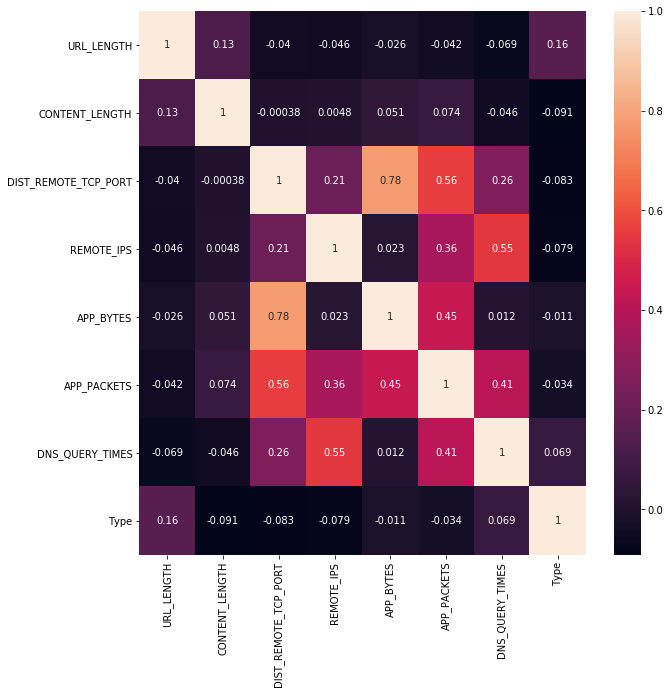

In [13]:
# Print heatmap again

fig, ax = plt.subplots(figsize = (10,10))
ax = sns.heatmap(corr, annot=True)
#sns.set_palette("husl")

# Challenge 3 - Handle Missing Values

The next step would be handling missing values. **We start by examining the number of missing values in each column, which you will do in the next cell.**

In [14]:
# Your code here

websites.isnull().sum()

URL                       0
URL_LENGTH                0
CHARSET                   0
SERVER                    1
CONTENT_LENGTH          812
WHOIS_COUNTRY             0
WHOIS_STATEPRO            0
WHOIS_REGDATE             0
WHOIS_UPDATED_DATE        0
DIST_REMOTE_TCP_PORT      0
REMOTE_IPS                0
APP_BYTES                 0
APP_PACKETS               0
DNS_QUERY_TIMES           1
Type                      0
dtype: int64

If you remember in the previous labs, we drop a column if the column contains a high proportion of missing values. After dropping those problematic columns, we drop the rows with missing values.

#### In the cells below, handle the missing values from the dataset. Remember to comment the rationale of your decisions.

In [15]:
# Your code here

websites.drop(['CONTENT_LENGTH'], axis = 1, inplace = True)


In [16]:
websites.dropna(inplace = True)

#### Again, examine the number of missing values in each column. 

If all cleaned, proceed. Otherwise, go back and do more cleaning.

In [17]:
# Examine missing values in each column

websites.isnull().sum()

URL                     0
URL_LENGTH              0
CHARSET                 0
SERVER                  0
WHOIS_COUNTRY           0
WHOIS_STATEPRO          0
WHOIS_REGDATE           0
WHOIS_UPDATED_DATE      0
DIST_REMOTE_TCP_PORT    0
REMOTE_IPS              0
APP_BYTES               0
APP_PACKETS             0
DNS_QUERY_TIMES         0
Type                    0
dtype: int64

# Challenge 4 - Handle `WHOIS_*` Categorical Data

There are several categorical columns we need to handle. These columns are:

* `URL`
* `CHARSET`
* `SERVER`
* `WHOIS_COUNTRY`
* `WHOIS_STATEPRO`
* `WHOIS_REGDATE`
* `WHOIS_UPDATED_DATE`

How to handle string columns is always case by case. Let's start by working on `WHOIS_COUNTRY`. Your steps are:

1. List out the unique values of `WHOIS_COUNTRY`.
1. Consolidate the country values with consistent country codes. For example, the following values refer to the same country and should use consistent country code:
    * `CY` and `Cyprus`
    * `US` and `us`
    * `SE` and `se`
    * `GB`, `United Kingdom`, and `[u'GB'; u'UK']`

#### In the cells below, fix the country values as intructed above.

In [18]:
# Your code here

websites.WHOIS_COUNTRY.unique()

websites.WHOIS_COUNTRY.replace(to_replace = {'Cyprus': 'CY', 'us': 'US', 'ru': 'RU', 'se':'SE', "[u'GB'; u'UK']":"GB", "United Kingdom": "GB"}, inplace = True)

In [19]:
websites.WHOIS_COUNTRY.value_counts()

US      1105
None     306
CA        83
ES        63
AU        35
GB        25
PA        21
JP        11
IN        10
UK        10
CN        10
CZ         9
FR         9
RU         6
NL         6
CH         6
KR         5
SE         4
BS         4
PH         4
AT         4
HK         3
TR         3
BE         3
DE         3
SC         3
KY         3
KG         2
NO         2
UA         2
BR         2
IL         2
SI         2
CY         2
UY         2
AE         1
UG         1
LV         1
BY         1
TH         1
IE         1
PK         1
IT         1
LU         1
Name: WHOIS_COUNTRY, dtype: int64

Since we have fixed the country values, can we convert this column to ordinal now?

Not yet. If you reflect on the previous labs how we handle categorical columns, you probably remember we ended up dropping a lot of those columns because there are too many unique values. Too many unique values in a column is not desirable in machine learning because it makes prediction inaccurate. But there are workarounds under certain conditions. One of the fixable conditions is:

#### If a limited number of values account for the majority of data, we can retain these top values and re-label all other rare values.

The `WHOIS_COUNTRY` column happens to be this case. You can verify it by print a bar chart of the `value_counts` in the next cell to verify:

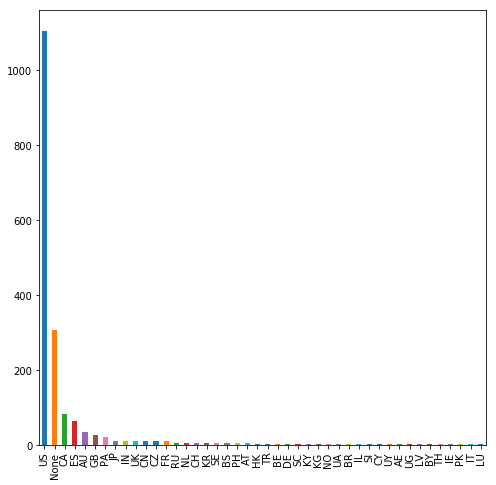

In [20]:
# Your code here

import matplotlib.pyplot as plt

fig, ax = plt.subplots(figsize = (8,8))
ax = websites["WHOIS_COUNTRY"].value_counts().plot.bar()


In [21]:
top10 = list(websites['WHOIS_COUNTRY'].value_counts().head(10).index) #punto index para coger los índices y poder usarlo ahora en el iloc.

#### After verifying, now let's keep the top 10 values of the column and re-label other columns with `OTHER`.

In [22]:
# Your code here

websites['WHOIS_COUNTRY'].loc[~websites['WHOIS_COUNTRY'].isin(top10)] = 'OTHER' 

# el burruñito (virgulilla) en este contexto niega el isin(), hace como un "isnotin()"

/usr/local/lib/python3.7/site-packages/pandas/core/indexing.py:189: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self._setitem_with_indexer(indexer, value)


In [23]:
websites['WHOIS_COUNTRY'].value_counts()

US       1105
None      306
OTHER     110
CA         83
ES         63
AU         35
GB         25
PA         21
JP         11
IN         10
UK         10
Name: WHOIS_COUNTRY, dtype: int64

Now since `WHOIS_COUNTRY` has been re-labelled, we don't need `WHOIS_STATEPRO` any more because the values of the states or provinces may not be relevant any more. We'll drop this column.

In addition, we will also drop `WHOIS_REGDATE` and `WHOIS_UPDATED_DATE`. These are the registration and update dates of the website domains. Not of our concerns.

#### In the next cell, drop `['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE']`.

In [24]:
# Your code here

websites.drop(['WHOIS_STATEPRO', 'WHOIS_REGDATE', 'WHOIS_UPDATED_DATE'], axis = 1, inplace = True)

websites.head()

,URL,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,M0_109,16,iso-8859-1,nginx,None,0,2,700,9,2.0,1
1,B0_2314,16,UTF-8,Apache/2.4.10,None,7,4,1230,17,0.0,0
2,B0_911,16,us-ascii,Microsoft-HTTPAPI/2.0,None,0,0,0,0,0.0,0
3,B0_113,17,ISO-8859-1,nginx,US,22,3,3812,39,8.0,0
4,B0_403,17,UTF-8,None,US,2,5,4278,61,4.0,0


# Challenge 5 - Handle Remaining Categorical Data & Convert to Ordinal

Now print the `dtypes` of the data again. Besides `WHOIS_COUNTRY` which we already fixed, there should be 3 categorical columns left: `URL`, `CHARSET`, and `SERVER`.

In [25]:
# Your code here

websites.dtypes

URL                      object
URL_LENGTH                int64
CHARSET                  object
SERVER                   object
WHOIS_COUNTRY            object
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
dtype: object

#### `URL` is easy. We'll simply drop it because it has too many unique values that there's no way for us to consolidate.

In [26]:
# Your code here

websites.drop(['URL'], axis = 1, inplace = True)

#### Print the unique value counts of `CHARSET`. You see there are only a few unique values. So we can keep it as it is.

In [27]:
# Your code here

websites.CHARSET.value_counts()

UTF-8           674
ISO-8859-1      427
utf-8           379
us-ascii        155
iso-8859-1      134
None              7
windows-1252      1
ISO-8859          1
windows-1251      1
Name: CHARSET, dtype: int64

`SERVER` is a little more complicated. Print its unique values and think about how you can consolidate those values.

#### Before you think of your own solution, don't read the instructions that come next.

In [28]:
# Your code here

websites.SERVER.value_counts()

Apache                                                                                                                385
nginx                                                                                                                 211
None                                                                                                                  175
Microsoft-HTTPAPI/2.0                                                                                                 113
cloudflare-nginx                                                                                                       94
Microsoft-IIS/7.5                                                                                                      51
GSE                                                                                                                    49
Server                                                                                                                 49
YouTubeFrontEnd         

![Think Hard](../think-hard.jpg)

In [29]:
# Your comment here

# De alguna forma habría que unificar cada servidor, todos los Microsoft juntos, Apache... borrar los None, los Server...

Although there are so many unique values in the `SERVER` column, there are actually only 3 main server types: `Microsoft`, `Apache`, and `nginx`. Just check if each `SERVER` value contains any of those server types and re-label them. For `SERVER` values that don't contain any of those substrings, label with `Other`.

At the end, your `SERVER` column should only contain 4 unique values: `Microsoft`, `Apache`, `nginx`, and `Other`.

In [30]:
# Your code here

# websites['WHOIS_COUNTRY'].loc[~websites['WHOIS_COUNTRY'].isin(top10)] = 'OTHER' 


servs = ['Microsoft', 'Apache', 'nginx']

def servers(x, servs=['Microsoft', 'Apache', 'nginx']):
    for s in servs: 
        if s in x: 
            return s
    return 'Other'
    
websites.SERVER = websites.SERVER.apply(servers)
    
websites.head(10) 

,URL_LENGTH,CHARSET,SERVER,WHOIS_COUNTRY,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type
0,16,iso-8859-1,nginx,None,0,2,700,9,2.0,1
1,16,UTF-8,Apache,None,7,4,1230,17,0.0,0
2,16,us-ascii,Microsoft,None,0,0,0,0,0.0,0
3,17,ISO-8859-1,nginx,US,22,3,3812,39,8.0,0
4,17,UTF-8,Other,US,2,5,4278,61,4.0,0
5,18,UTF-8,nginx,OTHER,6,9,894,11,0.0,0
6,18,iso-8859-1,Apache,US,0,3,1189,14,2.0,0
7,19,us-ascii,Microsoft,US,0,0,0,0,0.0,0
8,20,utf-8,nginx,None,0,0,0,2,2.0,1
9,20,utf-8,nginx,None,0,0,0,2,2.0,1


In [31]:
# Count `SERVER` value counts here

websites.SERVER.value_counts()

Apache       642
Other        504
nginx        435
Microsoft    198
Name: SERVER, dtype: int64

OK, all our categorical data are fixed now. **Let's convert them to ordinal data using Pandas' `get_dummies` function ([documentation](https://pandas.pydata.org/pandas-docs/stable/generated/pandas.get_dummies.html)).** Make sure you drop the categorical columns by passing `drop_first=True` to `get_dummies` as we don't need them any more. **Also, assign the data with dummie values to a new variable `website_dummy`.**

In [32]:
# Your code here

website_dummy = pd.get_dummies(websites, drop_first=True) # con el drop_first, se quita la primera columna de cada variable categórica que hemos dividido en dummies. Pero no afecta al resultado
website_dummy.head(10)

,URL_LENGTH,DIST_REMOTE_TCP_PORT,REMOTE_IPS,APP_BYTES,APP_PACKETS,DNS_QUERY_TIMES,Type,CHARSET_ISO-8859-1,CHARSET_None,CHARSET_UTF-8,...,WHOIS_COUNTRY_CA,WHOIS_COUNTRY_ES,WHOIS_COUNTRY_GB,WHOIS_COUNTRY_IN,WHOIS_COUNTRY_JP,WHOIS_COUNTRY_None,WHOIS_COUNTRY_OTHER,WHOIS_COUNTRY_PA,WHOIS_COUNTRY_UK,WHOIS_COUNTRY_US
0,16,0,2,700,9,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
1,16,7,4,1230,17,0.0,0,0,0,1,...,0,0,0,0,0,1,0,0,0,0
2,16,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
3,17,22,3,3812,39,8.0,0,1,0,0,...,0,0,0,0,0,0,0,0,0,1
4,17,2,5,4278,61,4.0,0,0,0,1,...,0,0,0,0,0,0,0,0,0,1
5,18,6,9,894,11,0.0,0,0,0,1,...,0,0,0,0,0,0,1,0,0,0
6,18,0,3,1189,14,2.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
7,19,0,0,0,0,0.0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
8,20,0,0,0,2,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0
9,20,0,0,0,2,2.0,1,0,0,0,...,0,0,0,0,0,1,0,0,0,0


Now, inspect `website_dummy` to make sure the data and types are intended - there shouldn't be any categorical columns at this point.

In [33]:
website_dummy.dtypes

URL_LENGTH                int64
DIST_REMOTE_TCP_PORT      int64
REMOTE_IPS                int64
APP_BYTES                 int64
APP_PACKETS               int64
DNS_QUERY_TIMES         float64
Type                      int64
CHARSET_ISO-8859-1        uint8
CHARSET_None              uint8
CHARSET_UTF-8             uint8
CHARSET_iso-8859-1        uint8
CHARSET_us-ascii          uint8
CHARSET_utf-8             uint8
CHARSET_windows-1251      uint8
CHARSET_windows-1252      uint8
SERVER_Microsoft          uint8
SERVER_Other              uint8
SERVER_nginx              uint8
WHOIS_COUNTRY_CA          uint8
WHOIS_COUNTRY_ES          uint8
WHOIS_COUNTRY_GB          uint8
WHOIS_COUNTRY_IN          uint8
WHOIS_COUNTRY_JP          uint8
WHOIS_COUNTRY_None        uint8
WHOIS_COUNTRY_OTHER       uint8
WHOIS_COUNTRY_PA          uint8
WHOIS_COUNTRY_UK          uint8
WHOIS_COUNTRY_US          uint8
dtype: object

In [34]:
# Ya no hay columnas categóricas!

# Challenge 6 - Modeling, Prediction, and Evaluation

We'll start off this section by splitting the data to train and test. **Name your 4 variables `X_train`, `X_test`, `y_train`, and `y_test`. Select 80% of the data for training and 20% for testing.**

In [35]:
cols = [col for col in website_dummy.columns.values if col != "Type"]
X = website_dummy[cols]
y = website_dummy["Type"]

In [36]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape )

(1423, 27) (356, 27) (1423,) (356,)


#### For this lab, we will opt to use SVM. 

Support Vector Machines, or SVM, is an algorithm that aims to draw a line or a plane between the two groups such that they are linearly separable and the distance from the observations of each group to the line or plane is maximized. The goal of the algorithm is to find the line or plane that separates the groups. You can read more about this algorithm [here](https://en.wikipedia.org/wiki/Support_vector_machine).

In the next cell, `svm` will be imported for you. **You will initialize the proper estimator, fit the training data, and predict the test data.**

The `sklearn.svm` class documentation can be found [here](https://scikit-learn.org/stable/modules/classes.html#module-sklearn.svm). By reading the documentation and searching online, the question you'll need to answer is **which SVM estimator to use**? When you choose the estimator, keep the following in mind:

* Our data are categorical, not continuous.

* We have removed the correlated columns. All columns we have right now are independent.

If your statistical knowledge is not adequate at this moment, don't worry. Just play around and make an informed guess. We'll evaluate your prediction in the next step. If the prediction is unsatisfactory you can move back to this step to modify your estimator.

## SVC

In [37]:
from sklearn import svm
from sklearn.svm import SVC

cls1 = SVC(gamma = "auto")
cls1.fit(X_train, y_train)


SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In the following cell, we'll show you how to compute the accuracy of your prediction. The output score will show you how often your classifier is correct. If you have used the proper estimator, your accuracy score should be over 0.9. However, if your accuracy score is unsatisfactory, go back to the previous step to try another estimator until you produce a satisfactory accuracy score.

In [38]:
# Computer prediction accuracy

from sklearn import metrics

y_pred1 = cls1.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred1))

# pinta bien! 

Accuracy: 0.9438202247191011


# Bonus Challenge - Feature Scaling

Problem-solving in machine learning is iterative. You can improve your model prediction with various techniques (there is a sweetspot for the time you spend and the improvement you receive though). Now you've completed only one iteration of ML analysis. There are more iterations you can conduct to make improvements. In order to be able to do that, you will need deeper knowledge in statistics and master more data analysis techniques. In this bootcamp, we don't have time to achieve that advanced goal. But you will make constant efforts after the bootcamp to eventually get there.

However, now we do want you to learn one of the advanced techniques which is called *feature scaling*. The idea of feature scaling is to standardize/normalize the range of independent variables or features of the data. This can make the outliers more apparent so that you can remove them. This step needs to happen during Challenge 6 after you split the training and test data because you don't want to split the data again which makes it impossible to compare your results with and without feature scaling. For general concepts about feature scaling, click [here](https://en.wikipedia.org/wiki/Feature_scaling). To read deeper, click [here](https://medium.com/greyatom/why-how-and-when-to-scale-your-features-4b30ab09db5e).

In the next cell, attempt to improve your model prediction accuracy by means of feature scaling. A library you can utilize is `sklearn.preprocessing.RobustScaler` ([documentation](https://scikit-learn.org/stable/modules/generated/sklearn.preprocessing.RobustScaler.html)). You'll use the `RobustScaler` to fit and transform your `X_train`, then transform `X_test`. You will use SVM to fit and predict your transformed data and obtain the accuracy score in the same way. Compare the accuracy score with your normalized data with the previous accuracy data. Is there an improvement?

## Robust Scaler

In [39]:
from sklearn.preprocessing import RobustScaler

RS = RobustScaler().fit(X_train)
X_train = RS.transform(X_train)

RS2 = RobustScaler().fit(X_test)
X_test = RS2.transform(X_test)

cls2 = SVC(gamma = "auto")
cls2.fit(X_train, y_train) 

SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
  decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
  max_iter=-1, probability=False, random_state=None, shrinking=True,
  tol=0.001, verbose=False)

In [40]:
y_pred2 = cls2.predict(X_test)
print("Accuracy:",metrics.accuracy_score(y_test, y_pred2))

# cool

Accuracy: 0.9438202247191011


# Bonus Bonus - More Predictions

## Logistic Regression, Cross Validation & OneVsRestClassifier

In [41]:
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.multiclass import OneVsRestClassifier

#cls = OneVsRestClassifier(LogisticRegression(solver="lbfgs"))

cls_LogisticRegression = OneVsRestClassifier(LogisticRegression(solver = "lbfgs"))
scores = cross_val_score(cls_LogisticRegression, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.87 (+/- 0.04)


/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:758: ConvergenceWarning: lbfgs failed to converge. Increase the number of iterations.
  "of iterations.", ConvergenceWarning)


## Linear Regression

In [42]:
from sklearn import linear_model

cls_LinearRegression = OneVsRestClassifier(linear_model.LinearRegression())
scores = cross_val_score(cls_LinearRegression, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.91 (+/- 0.09)


## Random Forest Classifier

In [43]:
from sklearn.ensemble import RandomForestClassifier

cls_RandomForestClassifier = OneVsRestClassifier(RandomForestClassifier(n_estimators = 20))
scores = cross_val_score(cls_RandomForestClassifier, X, y, cv = 5)
print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

Accuracy: 0.88 (+/- 0.13)


## Nu-Support Vector Classification.

In [56]:
from sklearn.svm import NuSVC

#cls_NuSVC = NuSVC(gamma='scale')
#cls_NuSVC = cls_NuSVC.fit(X, y) 
#scores = cross_val_score(cls_NuSVC, X, y, cv = 5)
#print("Accuracy: %0.2f (+/- %0.2f)" % (scores.mean(), scores.std() * 2))

# Bonus 2.0 - Roc Curve

In [44]:
import matplotlib.pyplot as plt

def plotMetrics(X, y, cls):
    y_pred_proba = cls.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    plt.title("AUC: {}".format(auc))
    plt.plot(fpr,tpr)

/usr/local/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:433: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


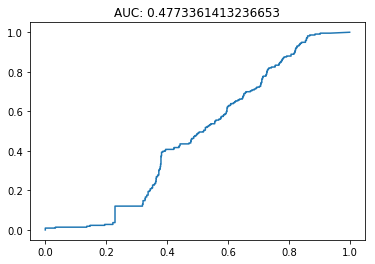

In [47]:
cls_LogisticRegression = LogisticRegression()

cls_LogisticRegression.fit(X_train,y_train)
cls_LogisticRegression.score(X_test, y_test)

plotMetrics(X,y,cls_LogisticRegression)

In [49]:
def plotMetricsCompare(X, y, cls1, cls2):
    y_pred_proba = cls1.predict_proba(X)[::,1]
    fpr, tpr, _ = metrics.roc_curve(y,  y_pred_proba)
    auc = metrics.roc_auc_score(y, y_pred_proba)
    
    y_pred_proba1 = cls2.predict_proba(X)[::,1]
    fpr1, tpr1, _ = metrics.roc_curve(y,  y_pred_proba1)
    auc1 = metrics.roc_auc_score(y, y_pred_proba1)

    plt.title("AUC Model 1: {:2f} AUC Model 2: {:2f}".format(auc, auc1))
    plt.plot(fpr,tpr)
    plt.plot(fpr1,tpr1)
    plt.legend(["Model 1", "Model 2"])

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)
/usr/local/lib/python3.7/site-packages/sklearn/linear_model/base.py:297: RuntimeWarning: overflow encountered in exp
  np.exp(prob, prob)


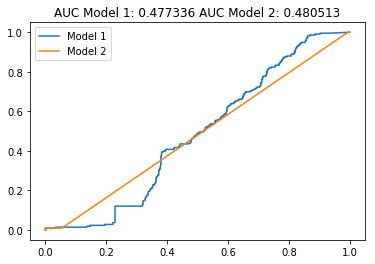

In [58]:
cls_SVC = svm.SVC(probability=True)
cls_SVC.fit(X_train,y_train)

plotMetricsCompare(X, y, cls_LogisticRegression, cls_SVC)

In [62]:
cls_SVC = svm.SVC(probability=True)
cls_SVC.fit(X_train,y_train)

plotMetricsCompare(X, y, cls_LinearRegression, cls_SVC)

/usr/local/lib/python3.7/site-packages/sklearn/svm/base.py:196: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


AttributeError: 'LinearRegression' object has no attribute 'predict_proba'